<a href="https://colab.research.google.com/github/Suryans01/Netflix-Movies-and-TV-shows-Clustering/blob/main/Netflix_Movies_and_TV_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Unsupervised ML - Netflix_Movies_and_TV_shows_Clustering**

##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -Manasvi Save**
##### **Team Member 2 -Sameer Rudani**


# **Project Summary -**

Netflix is an online platform that offers entertainment-focused streaming services. It is a large content service that requires a subscription. The majority of its content is split into two categories: TV shows and films. It's currently the most widely used OTT platform globally in recent years. Customers may, however, discontinue their subscriptions at any moment. As a result, the business needs to maintain users' interest and keep them hooked on the platform. This is where recommendation engines come into play; giving people insightful ideas is crucial.

Furthermore, Netflix operates as a media distribution business. Although it began with the mail-order distribution of DVDs, it has significantly changed over the years. Netflix's current concentration is on video streaming. A portion of the content is created internally, and a portion is licenced.

In order to analyse current trends and learn more about the content that is listed, we will be utilising Netflix data in this project. The dataset was gathered from Flixable, a third-party Netflix search engine. An intriguing analysis was issued in 2018 indicating that since 2010, the quantity of TV series available on Netflix has almost tripled. Since the number of TV shows on the streaming service has almost tripled while the number of films has dropped by more than 2,000 since 2010, it was high time a recommended method was developed. In order to deliver it, we will perform a data analysis, cluster comparable material by comparing text-based attributes, and then develop a recommendation engine.

# **GitHub Link -**

https://github.com/msave121/Unsupervised-ML-Netflix_Movies_and_TV_shows_Clustering

# **Problem Statement**

The dataset we are working with includes details about films and TV series that Netflix offered in 2019. It came from a third-party Netflix search engine called Flixable.

Some remarkable facts about Netflix's content offerings were revealed in an intriguing research that was published in 2018. The survey claims that throughout the course of 2010, the number of TV series available on Netflix has almost tripled, while the number of films has dropped by almost 2,000 titles. This demonstrates a notable change in the platform's content environment, with a stronger focus on television series.

There is a great chance to learn more by examining this dataset in more detail. Our understanding of the calibre and reception of the Netflix content can be further expanded by using additional datasets like Rotten Tomatoes and IMDB ratings. This connection creates opportunities to get interesting results and learn more about the platform's features in depth.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#Importing important libariers
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split, KFold

import warnings
warnings.filterwarnings('ignore')


<ipython-input-1-0332b2c78f49>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
# Data Head
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Tail of data
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

So, there are 7787 rows and 12 columns in our dataset

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# getting duplicates
Duplicates=df[df.duplicated()]
print(f'The Duplicate Values in Dataframe: ')
Duplicates

The Duplicate Values in Dataframe: 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


There are not any duplicates in our dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
null_counts = df.isna().sum()
null_counts

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are null or missing values in some columns those are director, cast, country, date_added, rating.

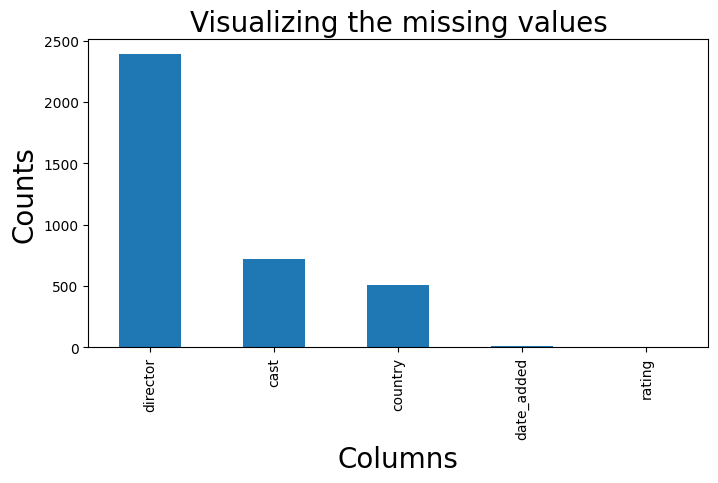

In [ ]:
# Visualizing the missing values

# Filter columns with null values
null_columns = null_counts[null_counts > 0]

null_columns.plot(kind='bar', figsize=(8,4))
plt.title('Visualizing the missing values',size=20)
plt.xlabel('Columns',size=20)
plt.ylabel('Counts',size=20)
plt.show()

### What did you know about your dataset?

### Answer - We found that our dataset consists of 7787 rows and 12 columns. The majority of the columns are of string data type. Some of the columns, namely "director," "cast," "country," "date_added," and "rating," have null values that need to be handled appropriately. These text-based features are intended to be grouped and clustered together. The resulting clusters can then serve as input for recommendation systems or similar applications. It is worth noting that the dataset does not contain any duplicate entries.

## ***2. Understanding Your Variables***

In [ ]:
# Let's check the columns of this Dataset

In [ ]:
# Description of this dataset
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Checking Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

### Making dataset ready for analysis

In [ ]:
df['title'].nunique()

7787

In [ ]:
# # Creating a copy of original dataset to keep it safe
df_new = df.copy()

In [ ]:
# Filling the missing values in the 'country' column with the mode i.e most frequent value
# If there are missing values it will replace them with the mode value of the 'country' column
df['country'] = df['country'].fillna(df['country'].mode().values[0])

In [ ]:
# Filling the missing values in the 'cast' column with the specified value 'No cast'
# If there are missing values it will replace them with the string 'No cast'
df['cast'].fillna(value='No cast',inplace=True)

In [ ]:
# Removing the rows with missing values in the 'date_added' and 'rating' columns
# If there are any missing values in these columns, the corresponding rows are dropped
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
# Creating a new column named 'Audience_AgeGroup' based on the values in the 'rating' column
# If the rating value is in the list ['TV-MA', 'NR', 'R', 'UR', 'NC-17'], the age group is assigned as 'Millennials'
# If the rating value is in the list ['TV-PG', 'TV-Y7-FV', 'TV-Y7', 'PG', 'TV-14', 'PG'], the age group is assigned as 'GenZ'
# For all other rating values, the age group is assigned as 'Kids'
df['Audience_AgeGroup']  = df['rating'].apply(lambda x:'Millennials' if x in ['TV-MA','NR','R','UR','NC-17'] else 'GenZ' if x in ['TV-PG','TV-Y7-FV', 'TV-Y7', 'PG','TV-14','PG' ]  else 'Kids')

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Chart - 1

### **Let's check type of content on Netflix**

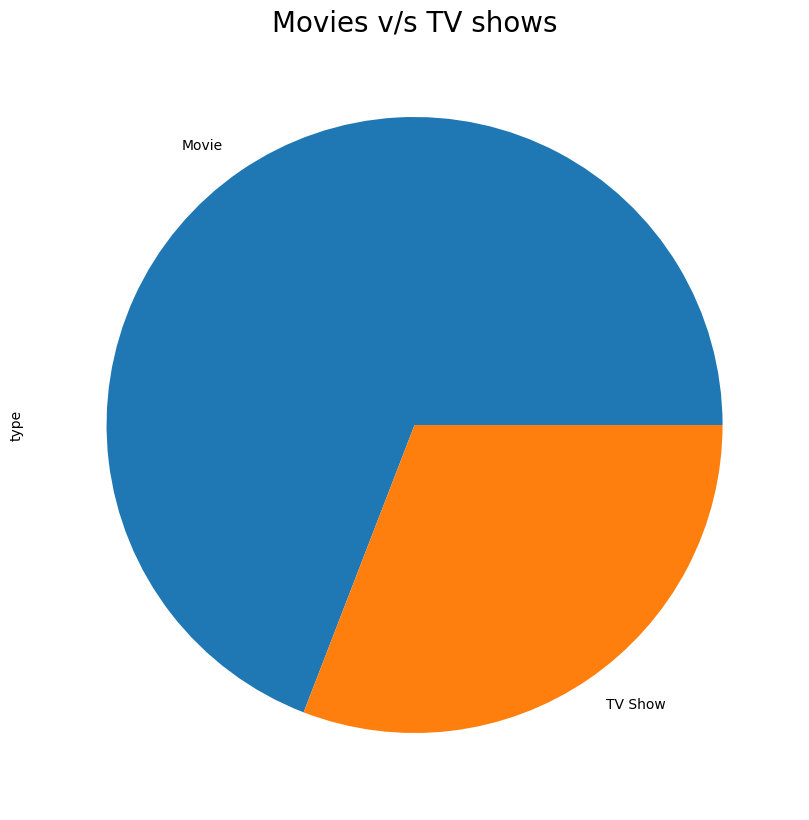

In [ ]:
# Distribution of type of content on Netflix
plt.figure(figsize=(10, 8))
df['type'].value_counts().plot(kind='pie')
plt.title('Movies v/s TV shows',size=10)
plt.show()


##### 1. Why did you pick the specific chart?

##### Answer - I chose this because a bar chart from the matplotlib library is a useful way to visually represent the proportions of different values within a variable.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - insights we got that Netflix has a larger collection of movies compared to TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - Netflix has a larger selection of movies compared to TV shows, which is beneficial for their business since movies tend to generate more revenue than TV shows.

### What all manipulations have you done and insights you found?

We removed the null values by filling them with appropriate mean, median amd mode values for column values.

## Chart - 2

### **Let's check the ratings of Movies and TV shows**

<Axes: >

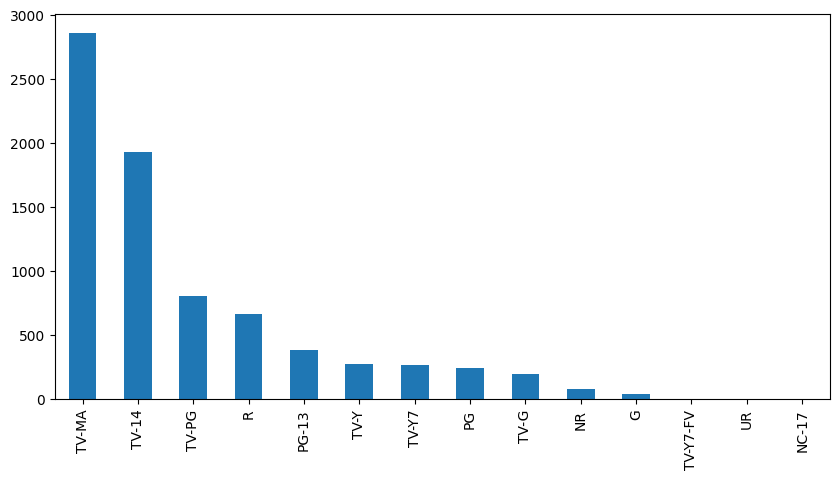

In [ ]:
# plot for ratings
df['rating'].value_counts().plot(kind='bar', figsize = (10,5))

##### 1. Why did you pick the specific chart?

##### Answer - We chose pie chart, which is created using the Matplotlib library, is a useful tool for visually representing the proportion or distribution of different values within a variable.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - The most common ratings for both movies and TV shows on Netflix are TV-MA and TV-14.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - The majority of content on Netflix carries ratings for mature audiences and viewers aged 14 and above. This is advantageous because the platform caters to a predominantly adult audience, increasing the likelihood of attracting and engaging a larger number of interested viewers.

## Chart - 3

### **Let's check type of shows and their ratings**

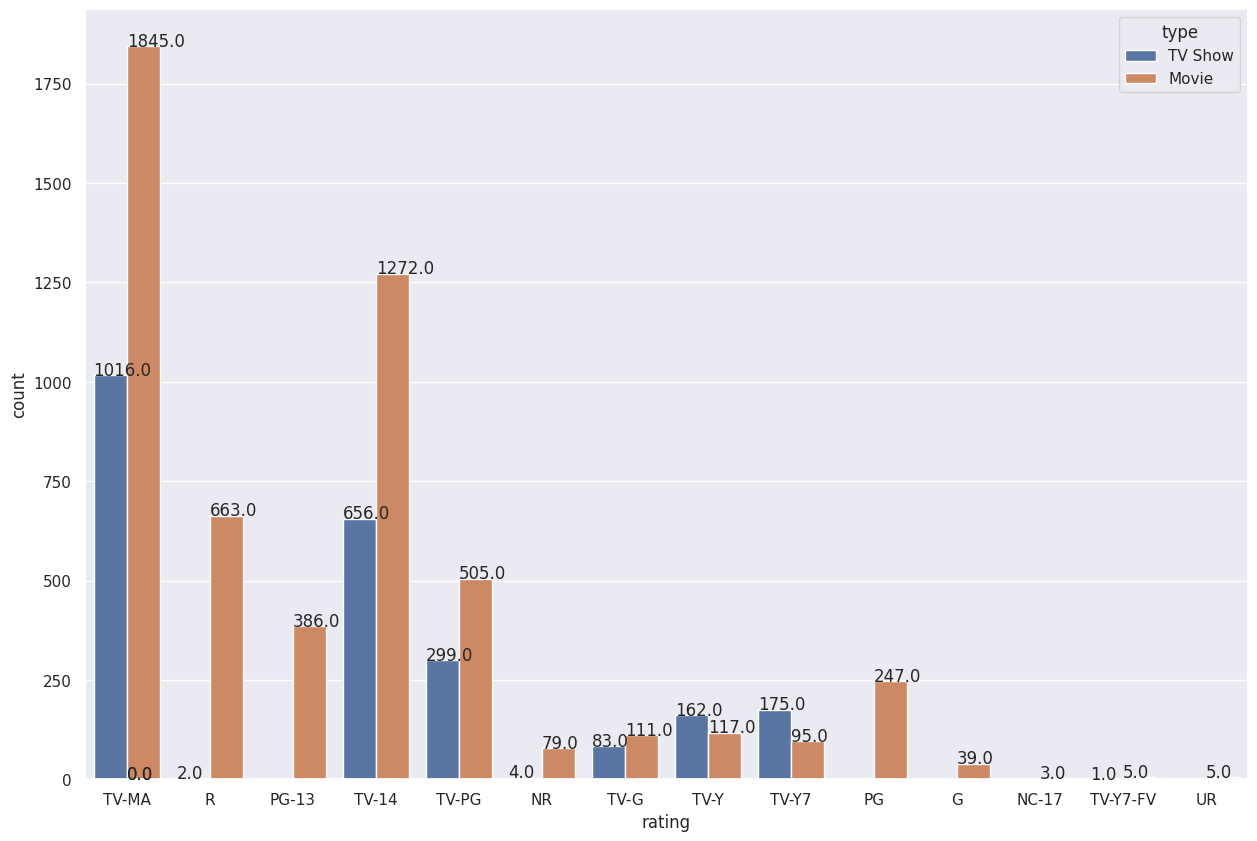

In [ ]:
# Setting the figure size for the plot
sns.set(rc={'figure.figsize':(10,8)})
# Creating a countplot using seaborn, with 'rating' on the x-axis and 'type' as the hue
ax = sns.countplot(data = df, x = 'rating', hue = 'type',)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.01))

##### 1. Why did you pick the specific chart?

##### Answer - I chose this because a Seaborn countplot is ideal for visually highlighting the differences between two values of a variable.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - Netflix offers a larger selection of TV-MA (Mature Audience) content, followed by TV-14 (14+) and TV-PG (Parental Guidance), compared to other content ratings. Notably, there are currently no TV shows available on Netflix with content based on ratings such as PG-13, PG, G, UR, etc. It's possible that these TV show statistics may change in the future as more diverse and varied content is produced.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - Netflix caters to a large customer base primarily from the United States and India. As a result, the content available on the platform is tailored to suit the preferences and interests of these major audiences. This approach ensures that the services provided by Netflix align well with the specific ratings that are most appealing to their target viewers.

## Chart - 4

### **Let's check content quantity for different age group**

<Axes: >

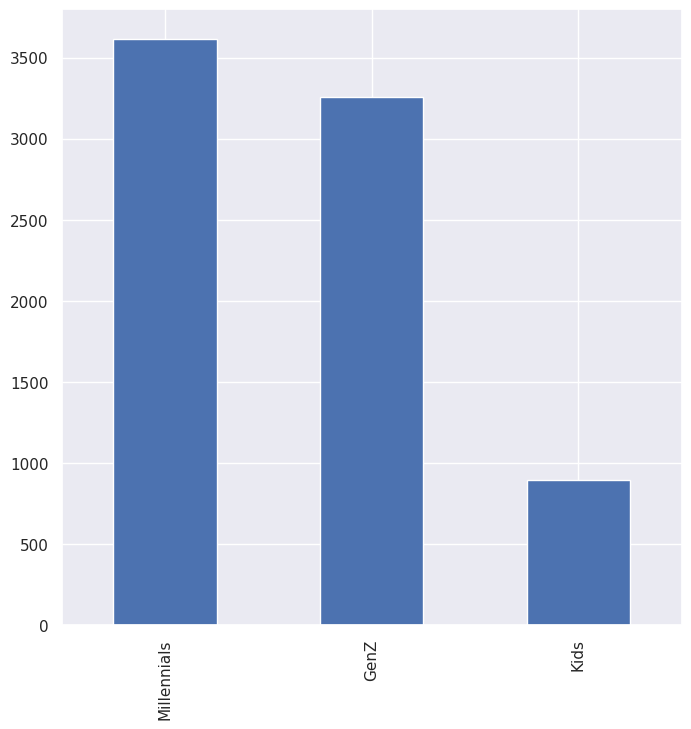

In [ ]:
# bar plot for age group of audience
plt.figure(figsize=(10,8))
df['Audience_AgeGroup'].value_counts().plot(kind='bar')

##### 1. Why did you pick the specific chart?

##### Answer - I chose this because a bar chart from the matplotlib library is a useful way to visually represent the proportions of different values within a variable.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - Netflix primarily focuses on providing content that caters to the interests and preferences of Millennials and GenZ audiences, rather than specifically targeting kids.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - Since a significant portion of Netflix users consists of Millennials and GenZ, it can be inferred that the content offered by the platform is well-suited to their tastes and preferences. As a result, a larger number of people are likely to be captivated and engaged by the content.

## Chart - 5

### **Distribuation of TV shows and movie for all type of audience**

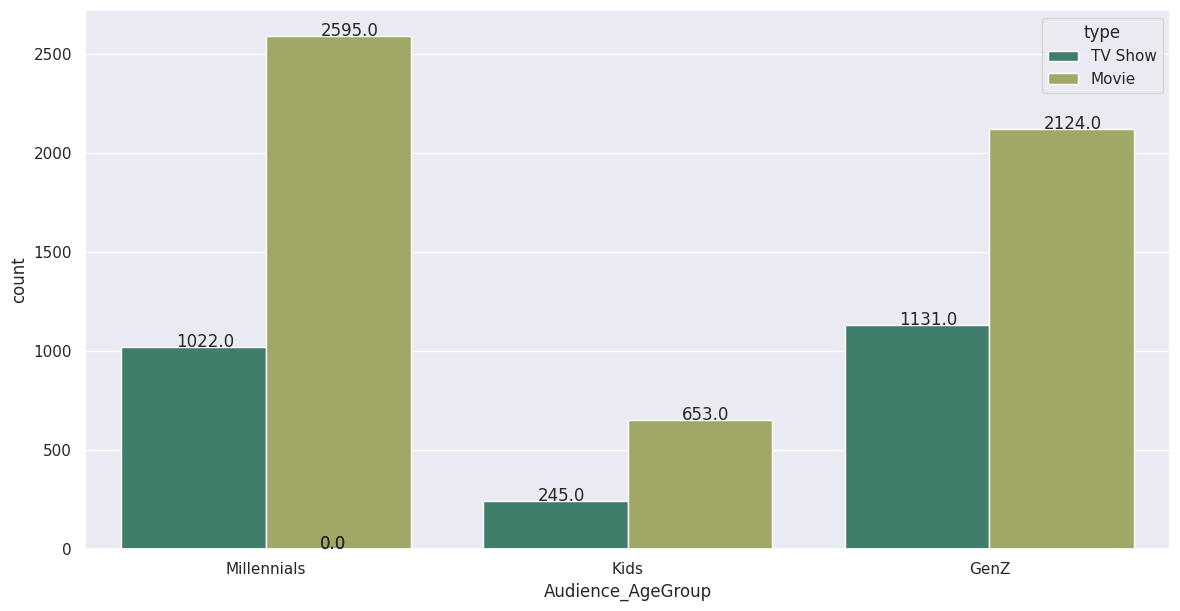

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.countplot(data = df, x = 'Audience_AgeGroup', hue = 'type',palette = 'gist_earth')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.01))

##### 1. Why did you pick the specific chart?

##### Answer - A countplot from the Seaborn library is a type of plot that allows us to easily compare and visualize the contrast between two values of a variable.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - Netflix offers a significantly larger amount of content for Millennials compared to other age groups, with the lowest content count being for Kids. The database primarily consists of a wide range of movies catering to Millennials, while the number of TV shows is relatively balanced between Millennials and GenZ age groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - Considering that the overall content on Netflix is predominantly composed of movies rather than TV shows, the quantity of content assigned to the movies section is higher compared to the TV shows section.

## Chart - 6

### **Violinplot for release year**

<Axes: xlabel='release_year'>

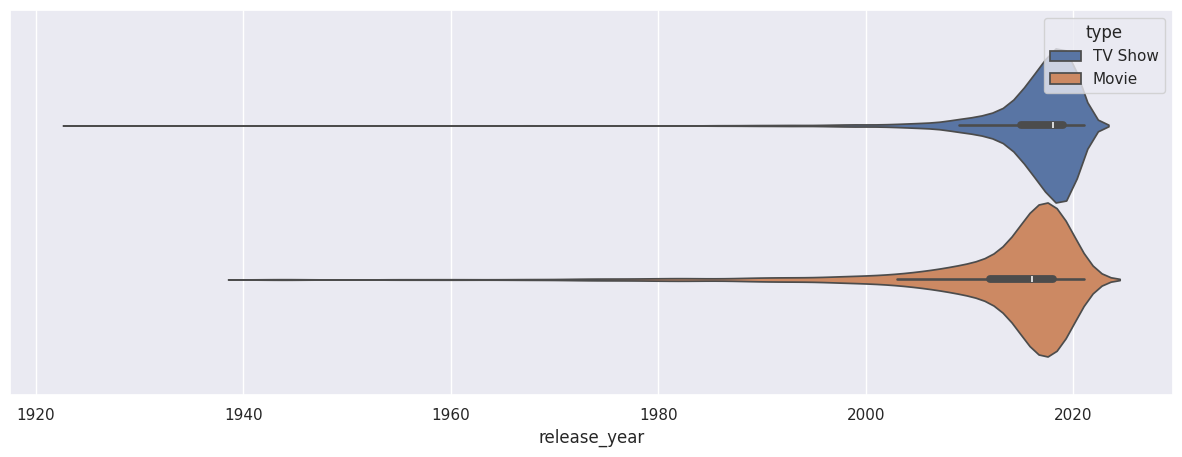

In [ ]:
# getting a violinplot for release year
sns.set(rc={'figure.figsize':(10,5)})
sns.violinplot(data = df, x = 'release_year', hue = 'type')

##### 1. Why did you pick the specific chart?

##### Answer - Violin plots are a type of visual representation similar to box plots. However, they provide additional information by displaying the probability density of the data at different values.

##### 2. What is/are the insight(s) found from the chart?

##### !. The years 2015-2019 witnessed the highest production of movies and TV shows.

##### 2. With the increasing digitalization of the world, people now have easy access to streaming content with just a click. During this period, there was a significant audience interest in Netflix, which led producers to prefer releasing their content on the platform.

##### 3. The popularity of OTT (Over-The-Top) platforms started to rise in 2017, and Netflix, being the largest OTT service provider, experienced a surge in viewership during that time.

##### 4. The rise of streaming services and the convenience they offer played a crucial role in attracting audiences during the years 2015-2019.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - Starting from 2015, the widespread adoption of smartphone technology worldwide led to a growing demand for accessible and engaging entertainment options. Netflix strategically launched its platform during this period, capturing the attention of users seeking convenient and diverse content. Since then, Netflix has successfully captivated audiences, establishing itself as a go-to platform for entertainment.

## Chart - 7

### **Year wise distribution of release year of Movies and TV shows**

<Axes: xlabel='release_year', ylabel='count'>

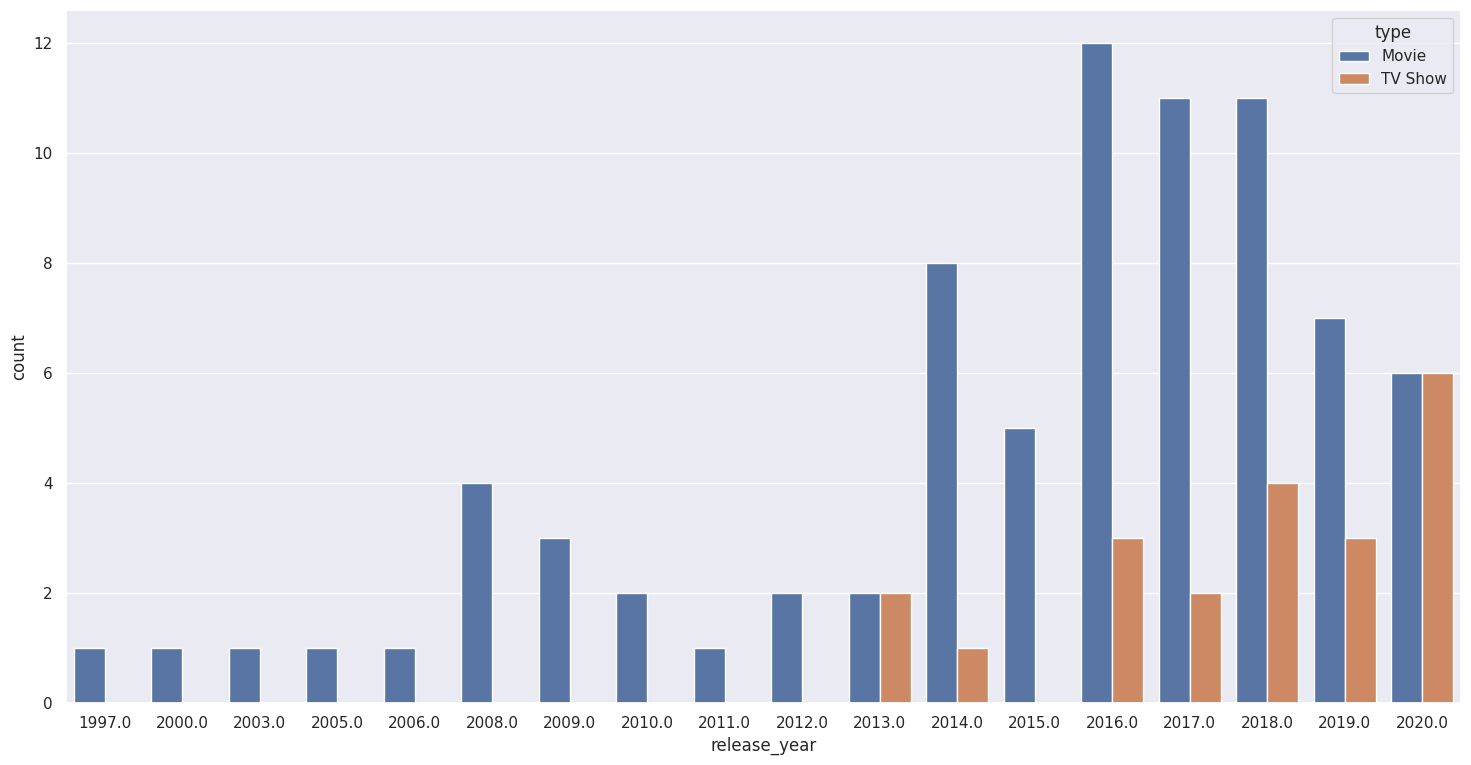

In [ ]:
# Setting the figure size for the plot
sns.set(rc={'figure.figsize':(10,9)})
# Create a countplot using seaborn, with 'release_year' on the x-axis (limited to the first 100 values) and 'type' as the hue
sns.countplot(data = df, x = df['release_year'][:100:], hue = 'type')

##### 1. Why did you pick the specific chart?

##### Answer - I chose this because a Seaborn countplot is ideal for visually highlighting the differences between two values of a variable.

##### 2. What is/are the insight(s) found from the chart?

##### Answer - Prior to 2012, the availability of TV shows on Netflix was limited or nonexistent. However, from that point onward, there has been a consistent and notable growth in the TV show content offered by Netflix. This progression has brought TV shows on par with movies, indicating a shift in Netflix's focus towards expanding its TV show offerings in recent years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

##### Answer - It is evident that the frequency of content growth is higher for TV shows compared to movies, suggesting that TV shows are more extensively watched by users. Considering that TV shows typically have longer durations than movies, this trend indicates that users are more likely to remain engaged and invested in the platform. This suggests that the appeal and popularity of TV shows are expected to continue increasing, resulting in an even larger and more dedicated user base.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

### HYPOTHESIS : Most of the content made on Netflix is for Gen Z.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**NULL HYPOTHESIS** : No, most of the content made on Netflix is not for Millennials.

**ALTERNATE HYPOTHESIS** : Yes, most of the content on Netflix is for Millennials.

### ***We assume siginificance level to be 0.05***

#### 2. Perform an appropriate statistical test.

In [ ]:
df['Audience_AgeGroup'].values

array(['Millennials', 'Millennials', 'Millennials', ..., 'Millennials',
       'GenZ', 'Millennials'], dtype=object)

In [ ]:

hypo_data = pd.crosstab(df['type'], df['Audience_AgeGroup'], margins=False)
hypo_data

Audience_AgeGroup,GenZ,Kids,Millennials
type,,,
Movie,2124,653,2595
TV Show,1131,245,1022


In [ ]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

p

2.137534084157046e-09

#### The p value is smaller than significance level ,So, we will reject the null hypothesis and accept the alternative hypothesis.

##### Which statistical test have you done to obtain P-Value?

##### Answer - We used a chi-square contingency analysis to examine the p-value associated with the hypothesis test.

##### Why did you choose the specific statistical test?

##### Answer - The Chi Square contingency test is a statistical method that helps determine if there is a relationship between variables based on the observed data. It forms the basis for statistical inference, where tests are conducted to assess the connection between variables.

### Hypothetical Statement - 2

### HYPOTHESIS : Is Netflix has increasingly focusing on TV rather than movies in recent years?.

### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:** No, year_added has no impact on type of content that gets added to the platform.

**Alternative Hypothesis:** Yes, year_added has impact on type of content that gets added to the platform.

### ***We assume siginificance level to be 0.05***

#### 2. Perform an appropriate statistical test.

In [ ]:

hypo_data = pd.crosstab(df['type'], df['date_added'], margins=False)
hypo_data

date_added,"April 15, 2018","April 16, 2019","April 17, 2016","April 20, 2017","April 4, 2017","August 1, 2017","August 13, 2018","August 21, 2017","August 4, 2017","December 1, 2018",...,"September 7, 2018","September 7, 2020","September 8, 2015","September 8, 2017","September 8, 2018","September 8, 2020","September 9, 2016","September 9, 2018","September 9, 2019","September 9, 2020"
type,,,,,,,,,,,,,,,,,,,,,
Movie,0,0,0,0,0,0,0,0,0,0,...,5,4,1,18,0,3,1,0,1,4
TV Show,1,1,1,1,1,1,1,1,3,1,...,4,1,0,3,2,2,0,1,0,2


In [ ]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

p

5.960094153540021e-43

#### The p value is smaller than significance level ,So, we will reject the null hypothesis and accept the alternative hypothesis.

##### Which statistical test have you done to obtain P-Value?

##### Answer - We used a chi-square contingency analysis to examine the p-value associated with the hypothesis test.

##### Why did you choose the specific statistical test?

##### Answer - The Chi Square contingency test is a statistical method that helps determine if there is a relationship between variables based on the observed data. It forms the basis for statistical inference, where tests are conducted to assess the connection between variables.

# ***6. Feature Engineering & Data Pre-processing***

###  Handling Missing Values


#### **The following codes have already been executed in the notebook to generate various charts and visualizations.**

In [ ]:
# df['country'] = df['country'].fillna(df['country'].mode().values[0])

In [ ]:
# df['cast'].fillna(value='No cast',inplace=True)

In [ ]:
# df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
# df_new.dropna(subset =(['director']), inplace =  True )

#### What all missing value imputation techniques have you used and why did you use those techniques?

##### Answer -

##### In order to handle missing values in the dataset:

##### 1.) We replaced the null values in the "country" column with the mode, which is the most frequently occurring value in that column.

##### 2.) We dropped the null values in the "date_added" and "rating" columns since the number of missing values was relatively small.

##### 3.) We filled the null values in the "cast" column with "no cast" because different movies can have varying numbers of cast members, and this allows us to indicate that there is no specific information available for those missing values.

###  Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

##### Answer - Since the column data types in the dataset are in string format, it is not possible to identify outliers. Therefore, we can conclude that there are no outliers in the dataset.

###  Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

##### Answer - Since all the columns in the dataset are in string format, there are no categorical columns.

###  Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

###  Feature Manipulation

### **The necessary feature manipulation has already been completed above and has been used for creating the charts.**

####  Feature Selection

In [ ]:
# Dropping the director column because of many missing values
df_new.drop(columns = (['director']), inplace =  True)

In [ ]:
data = df_new[['title']]
data['Filtered_data'] = (df_new['description'] + ' ' + df_new['listed_in'] + ' '+ df_new['cast'] + ' ' + df_new['country'] + ' ' + df_new['rating']).astype(str)
data.set_index('title', inplace = True)
data.head()

,Filtered_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


##### What all feature selection methods have you used  and why?


##### Answer - We removed the "director" column from the dataset because it had missing values in 50% of the data.

##### What all features have you selected  and why?

##### Answer - We chose the text-based features that are essential for Netflix's content filtering process. These features are considered important in determining the content that meets Netflix's criteria.

###  Removing Punctuations

In [ ]:
# Creating function to remove all the punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # Let's replace the punctuations with no space,
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [ ]:
data['Filtered_data'] = data['Filtered_data'].apply(remove_punctuation)
data.head(15)

,Filtered_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,When an army recruit is found dead his fellow ...
9,In a postapocalyptic world ragdoll robots hide...
21,A brilliant group of students become cardcount...
46,A genetics professor experiments with a treatm...
122,After an awful accident a couple admitted to a...
187,After one of his high school students attacks ...
706,When a doctor goes missing his psychiatrist wi...


###  Let's Remove all the Stopwords and White spaces

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# extracting the stopwords using nltk library
sw = nltk.corpus.stopwords.words('english')
# Let's see all stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
print("Counts of stopwords: ", len(sw))

Counts of stopwords:  179


In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
data['Filtered_data'] = data['Filtered_data'].apply(stopwords)
data.head(10)

,Filtered_data
title,
3%,future elite inhabit island paradise far crowd...
7:19,devastating earthquake hits mexico city trappe...
23:59,army recruit found dead fellow soldiers forced...
9,postapocalyptic world ragdoll robots hide fear...
21,brilliant group students become cardcounting e...
46,genetics professor experiments treatment comat...
122,awful accident couple admitted grisly hospital...
187,one high school students attacks dedicated tea...
706,doctor goes missing psychiatrist wife treats b...


###  Tokenization

In [ ]:
# creating a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['Filtered_data'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_before_stem = vocab_bef_stem.sort_values(ascending=False)

<Axes: >

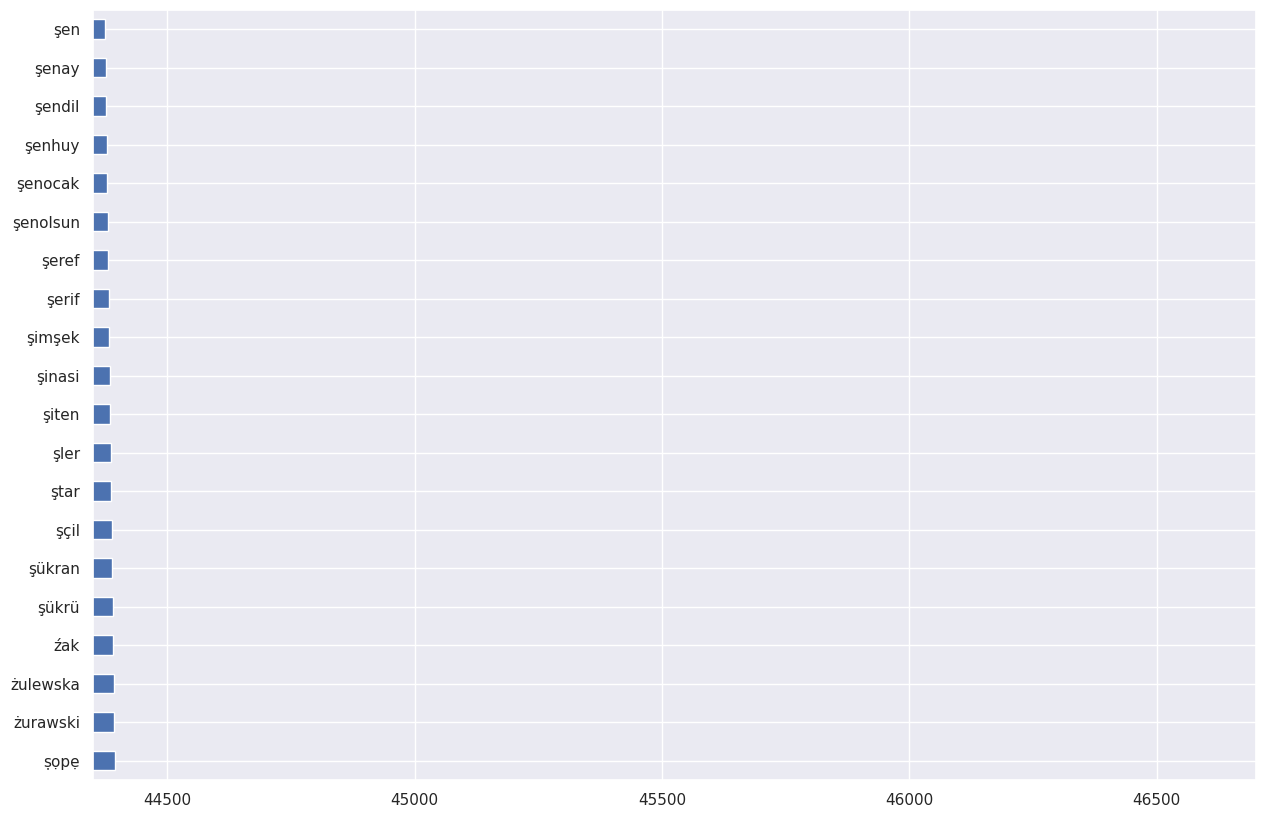

In [ ]:
top_vocab = vocab_before_stem.head(20)
top_vocab.plot(kind = 'barh', figsize = (15,10),xlim = (44350, 46700))

<Axes: >

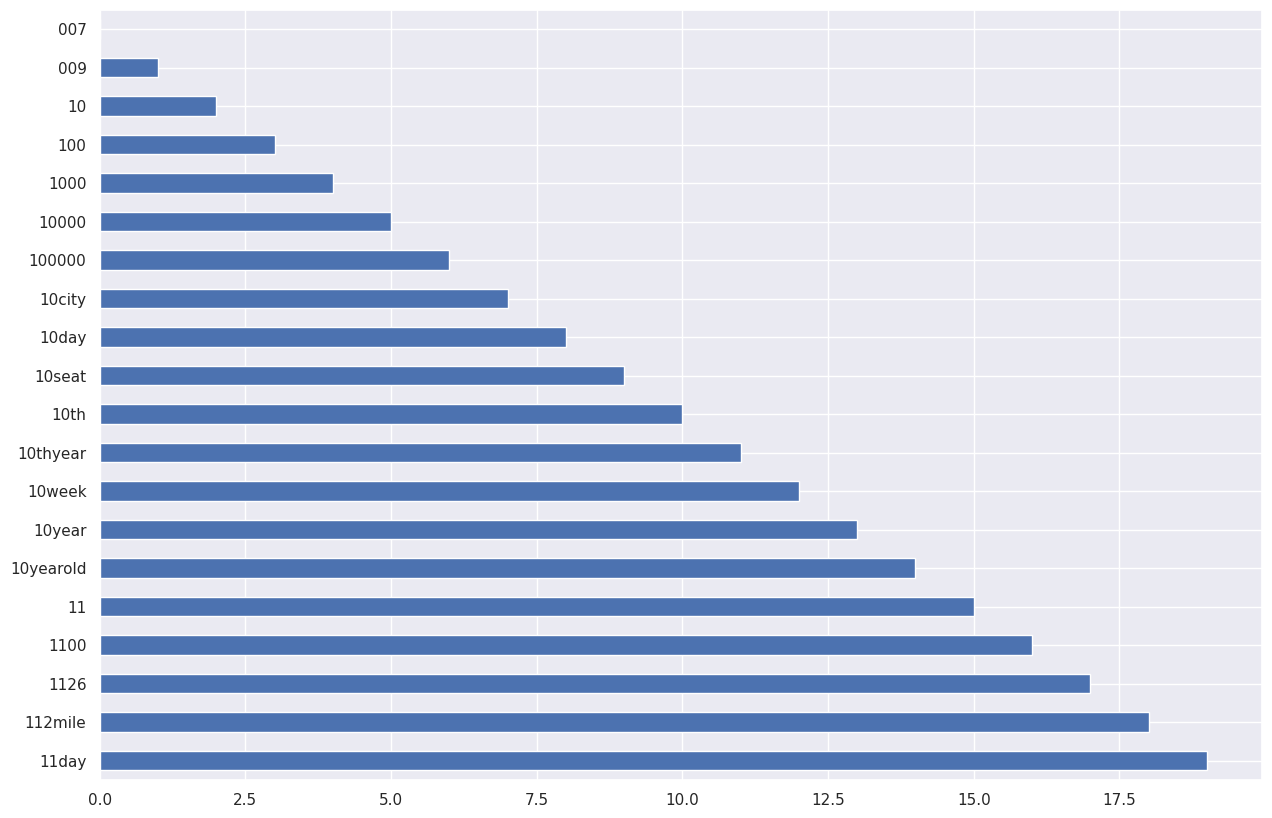

In [ ]:
top_vacab = vocab_before_stem.tail(20)
top_vacab.plot(kind = 'barh', figsize = (15,10),)

### Stemming using the SnowballStemmer

In [ ]:
# creating an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
data['Filtered_data'] = data['Filtered_data'].apply(stemming)
data.head(10)

,Filtered_data
title,
3%,futur elit inhabit island paradis far crowd sl...
7:19,devast earthquak hit mexico citi trap survivor...
23:59,armi recruit found dead fellow soldier forc co...
9,postapocalypt world ragdol robot hide fear dan...
21,brilliant group student becom cardcount expert...
46,genet professor experi treatment comatos siste...
122,aw accid coupl admit grisli hospit separ must ...
187,one high school student attack dedic teacher t...
706,doctor goe miss psychiatrist wife treat bizarr...


##### Which text normalization technique have you used and why?

##### Answer - We used the Snowball Stemmer, also known as the Porter2 stemming algorithm, is an improved version of the Porter Stemmer algorithm. It addresses some of the issues present in the Porter Stemmer and offers better performance in stemming words

###  Text Vectorization

In [ ]:
# creating the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# fiting the vectorizer using text data
tfid_vectorizer.fit(data['Filtered_data'])

# Let's collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

<Axes: >

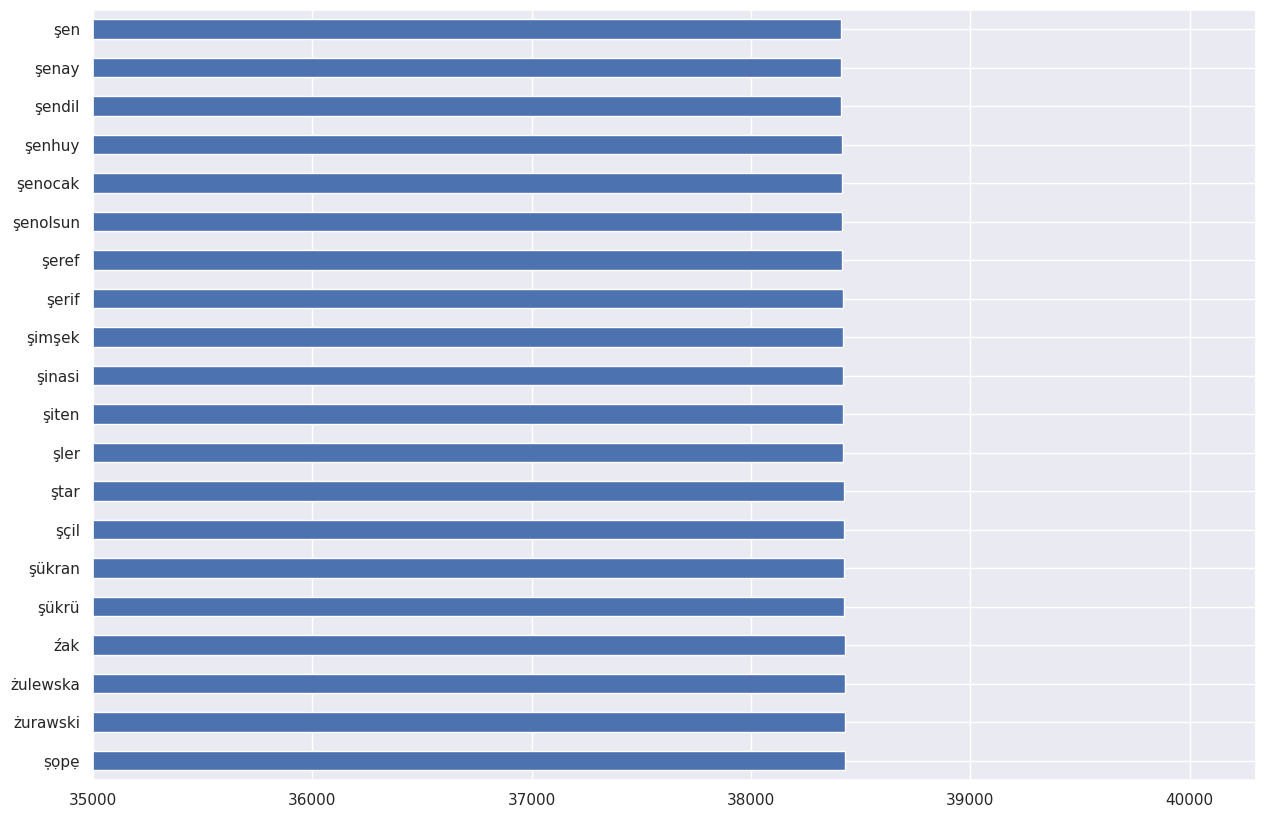

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(15,10),xlim = (35000, 40300))


##### Which text vectorization technique have you used and why?

##### Answer - We used Term frequency-inverse document frequency, TF-IDF is a technique used to convert text into a numerical vector representation. It combines two important concepts: term frequency (TF) and document frequency (DF).

###  Lower Casing

In [ ]:
# converting the "Filtered_data" column to lowercase using a lambda function
data['Filtered_data']= data['Filtered_data'].apply(lambda x: x.lower())

### Length of the features

In [ ]:
# This function returns the length of the text
def length(text):
    '''a function which returns the length of text'''
    return len(text)

In [ ]:
data['length_of_text'] = data['Filtered_data'].apply(length)
data.head()

,Filtered_data,length_of_text
title,,
3%,futur elit inhabit island paradis far crowd sl...,293
7:19,devast earthquak hit mexico citi trap survivor...,202
23:59,armi recruit found dead fellow soldier forc co...,237
9,postapocalypt world ragdol robot hide fear dan...,277
21,brilliant group student becom cardcount expert...,267


###  Data Transformation

In [ ]:
X =data.Filtered_data

In [ ]:
# Tranforming the data
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(X)

In [ ]:
# shape of the vectorized data
print(X.shape)

(7787, 20000)


###  Dimesionality Reduction

###Dimensionality Reduction using PCA (Principal Component Analysis)

In [ ]:
# Here we are reducing the components of X values to the principal component axes that explain 95% of the variance in order to improve efficiency.
from sklearn.decomposition import PCA
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(7787, 4839)

#### Do you think that dimensionality reduction is needed? Explain Why?

##### Answer - Yes, we think that dimentionality reduction is needed because statistical technique of reducing the amount of random variables in a problem by obtaining a set of principal variables.

#### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

##### Answer - We applied Principal Component Analysis (PCA) as the technique for dimensionality reduction. PCA helps to compress or summarize the original data by identifying the most important features and creating new variables, known as principal components, that capture the essential information of the dataset.

## ***7. ML Model Implementation***

#Eblow Method for K-means

Text(0, 0.5, 'WCSS')

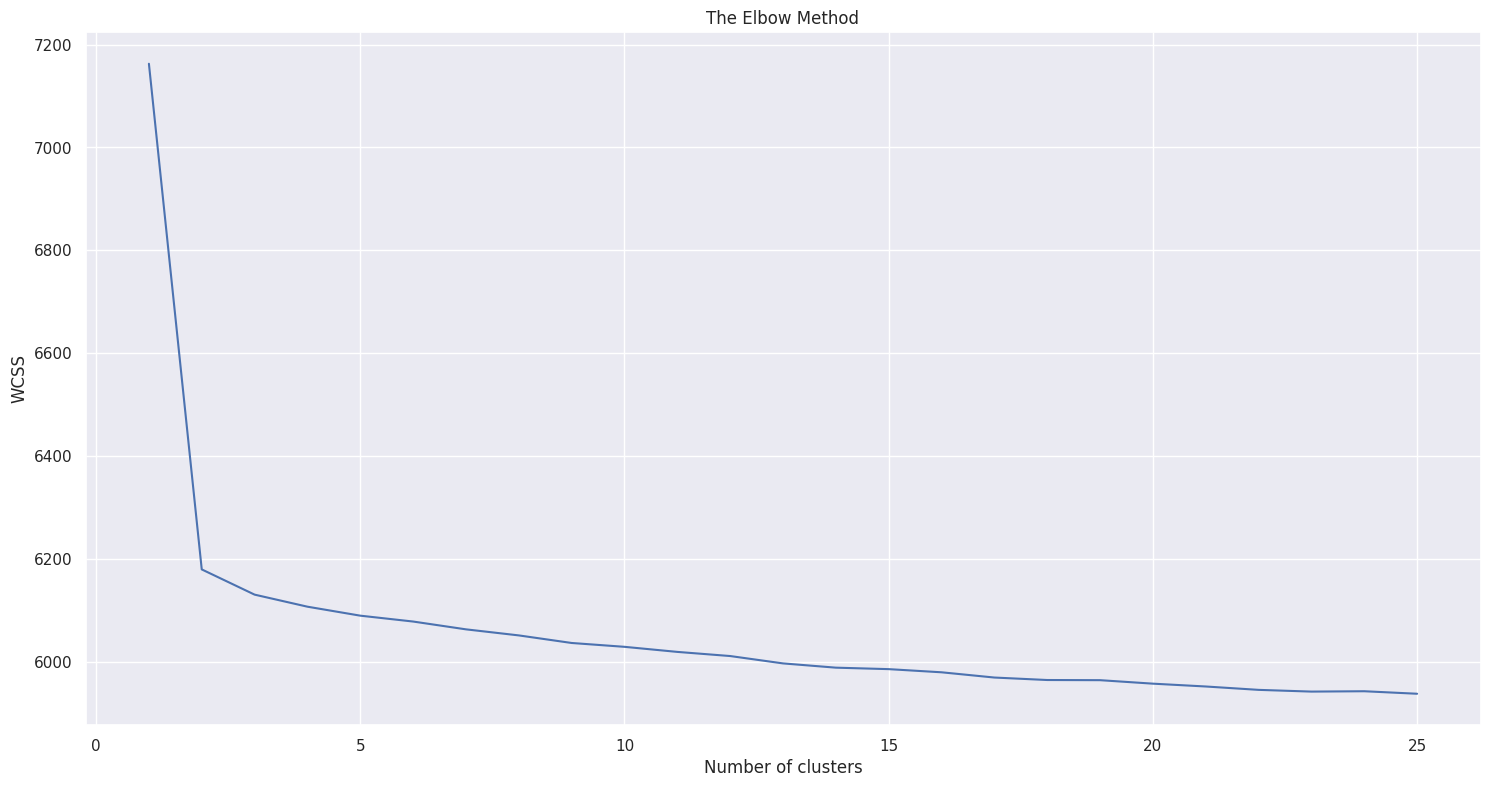

In [ ]:
# Importing the K-means
from sklearn.cluster import KMeans
# List to store the within-cluster sum of squares
wcss=[]
# Here we are iterating over different numbers of clusters
for i in range(1,26):
  kmeans = KMeans(i)
  kmeans.fit(X_transformed)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)
# Here we are plotting the WCSS values against the number of clusters
number_clusters = range(1,26)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

##### Answer - By observing the Elbow graph, we determined that the number of clusters is 18. This number was identified by looking for a sharp bend in the curve or a significant deviation from a straight line. We located this point on the x-axis to determine the value representing the number of clusters.

#Silhoutte Score for K-means

For n_clusters = 2 The average silhouette_score is : 0.16474755875360378
For n_clusters = 3 The average silhouette_score is : 0.15052098938526837
For n_clusters = 4 The average silhouette_score is : 0.15161603411120228
For n_clusters = 5 The average silhouette_score is : 0.15181504357714806
For n_clusters = 6 The average silhouette_score is : 0.15249828923461958
For n_clusters = 7 The average silhouette_score is : 0.15263639937523307
For n_clusters = 8 The average silhouette_score is : 0.1528804415441383
For n_clusters = 9 The average silhouette_score is : 0.14891841852701232
For n_clusters = 10 The average silhouette_score is : 0.1494464754340786
For n_clusters = 11 The average silhouette_score is : 0.15000508394522108
For n_clusters = 12 The average silhouette_score is : 0.15017003335853618
For n_clusters = 13 The average silhouette_score is : 0.15070924670704614
For n_clusters = 14 The average silhouette_score is : 0.15124804942990913
For n_clusters = 15 The average silhouette_score

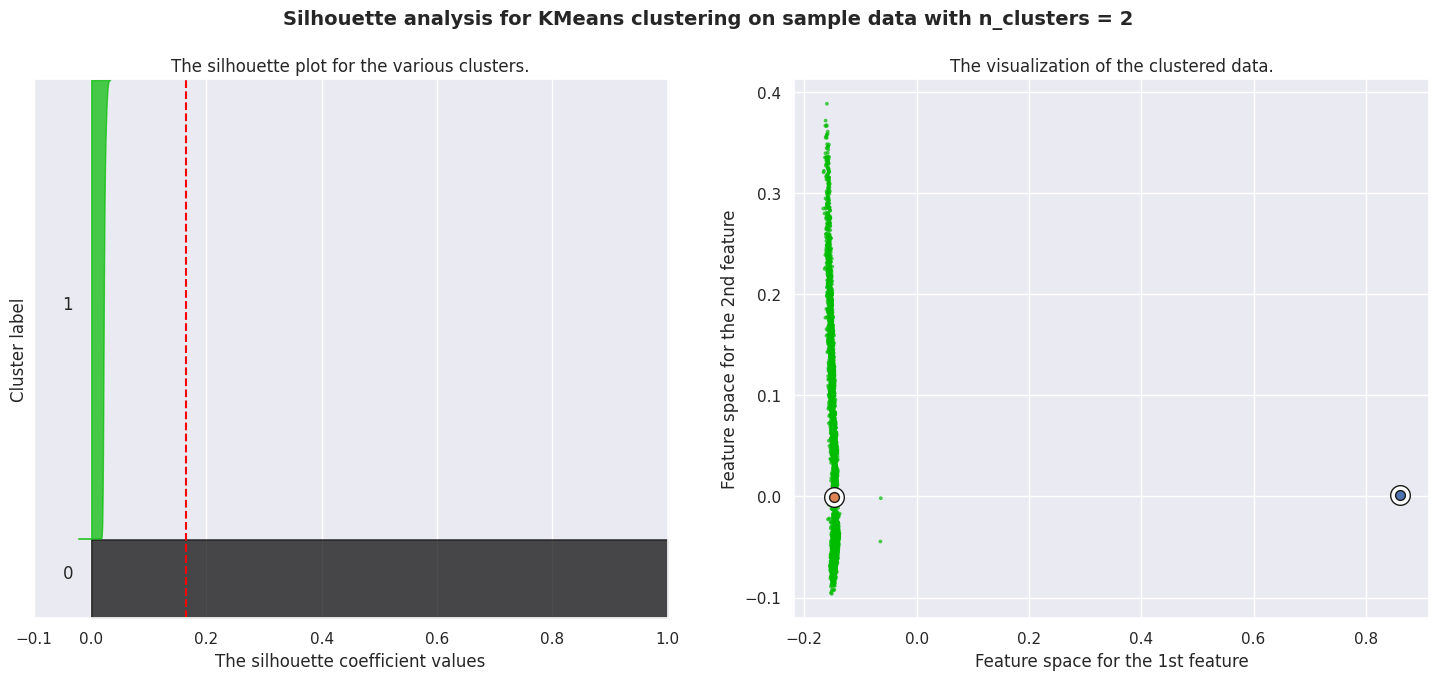

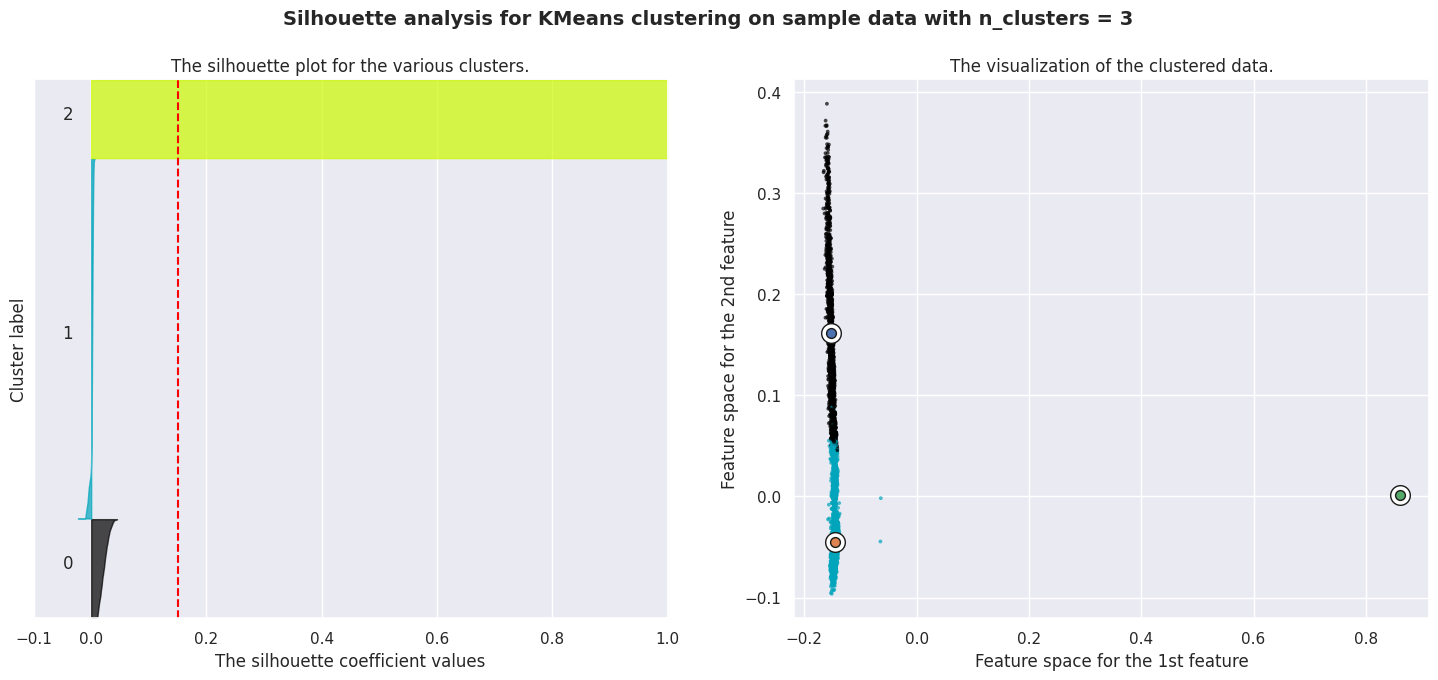

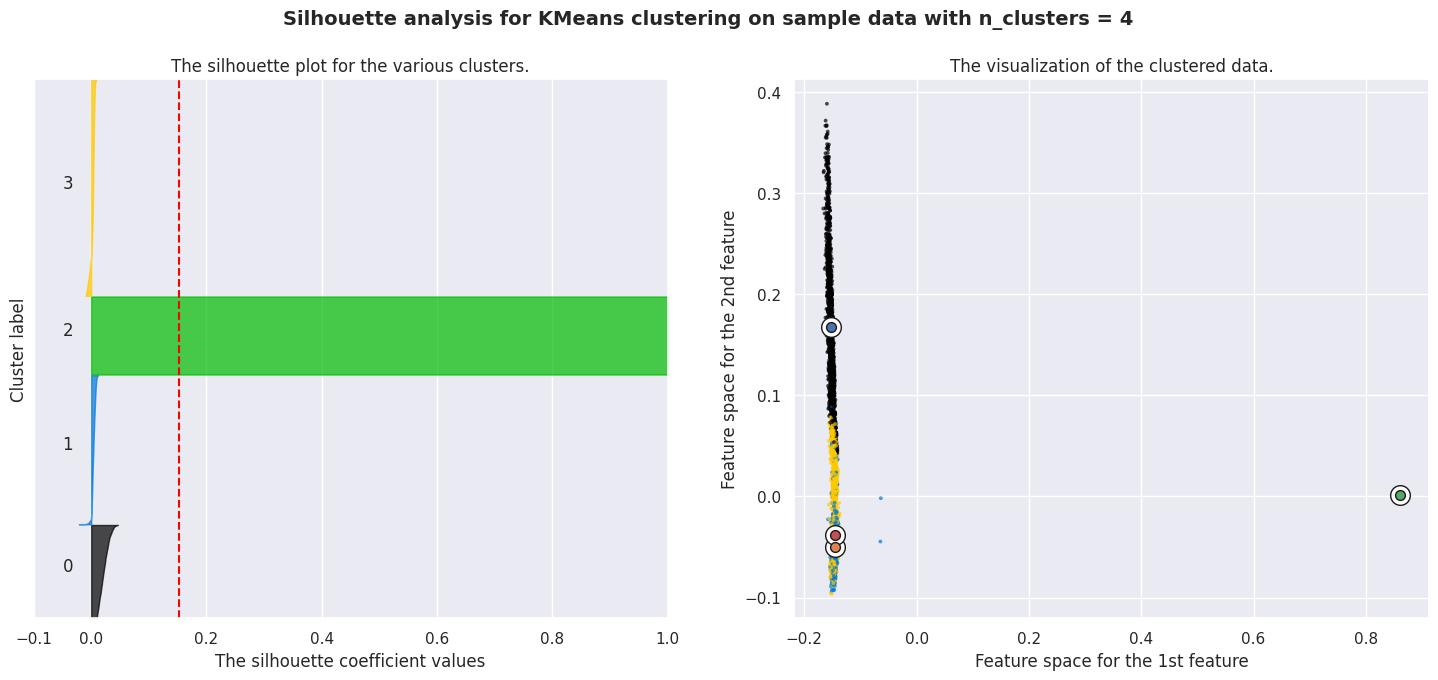

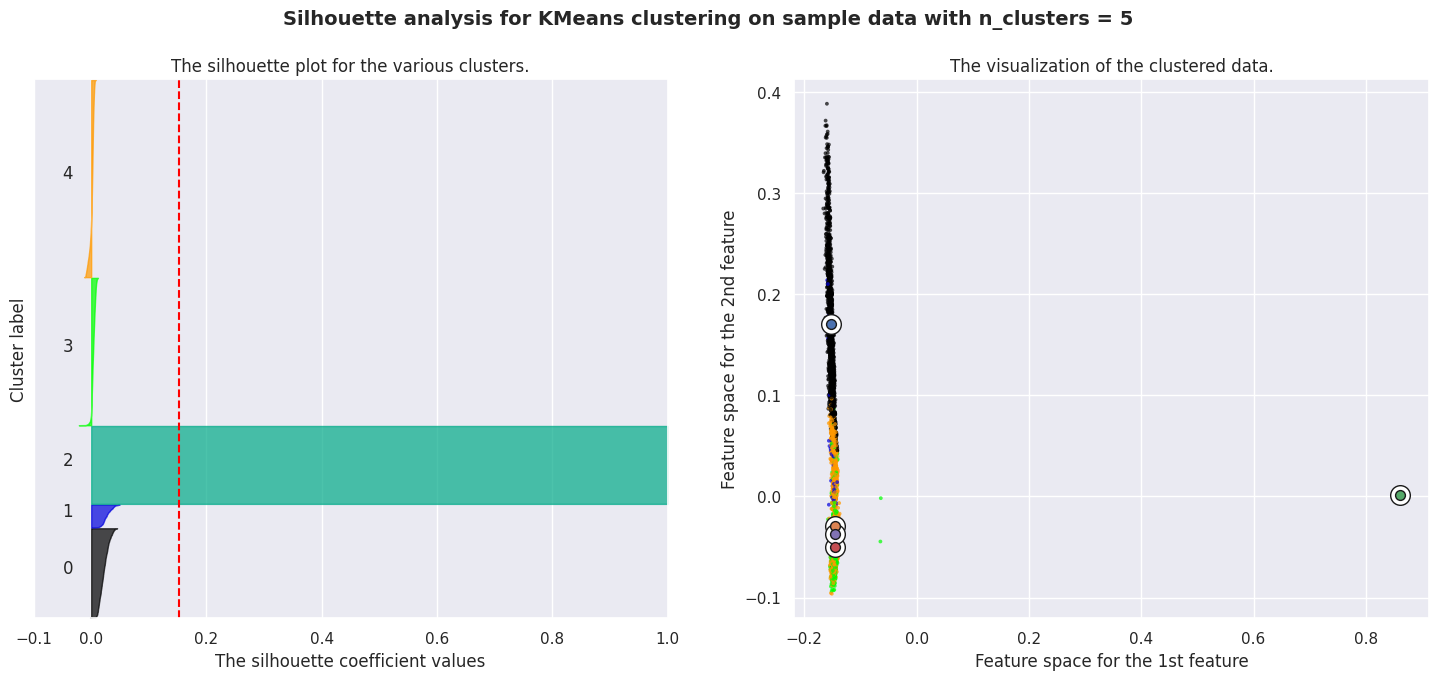

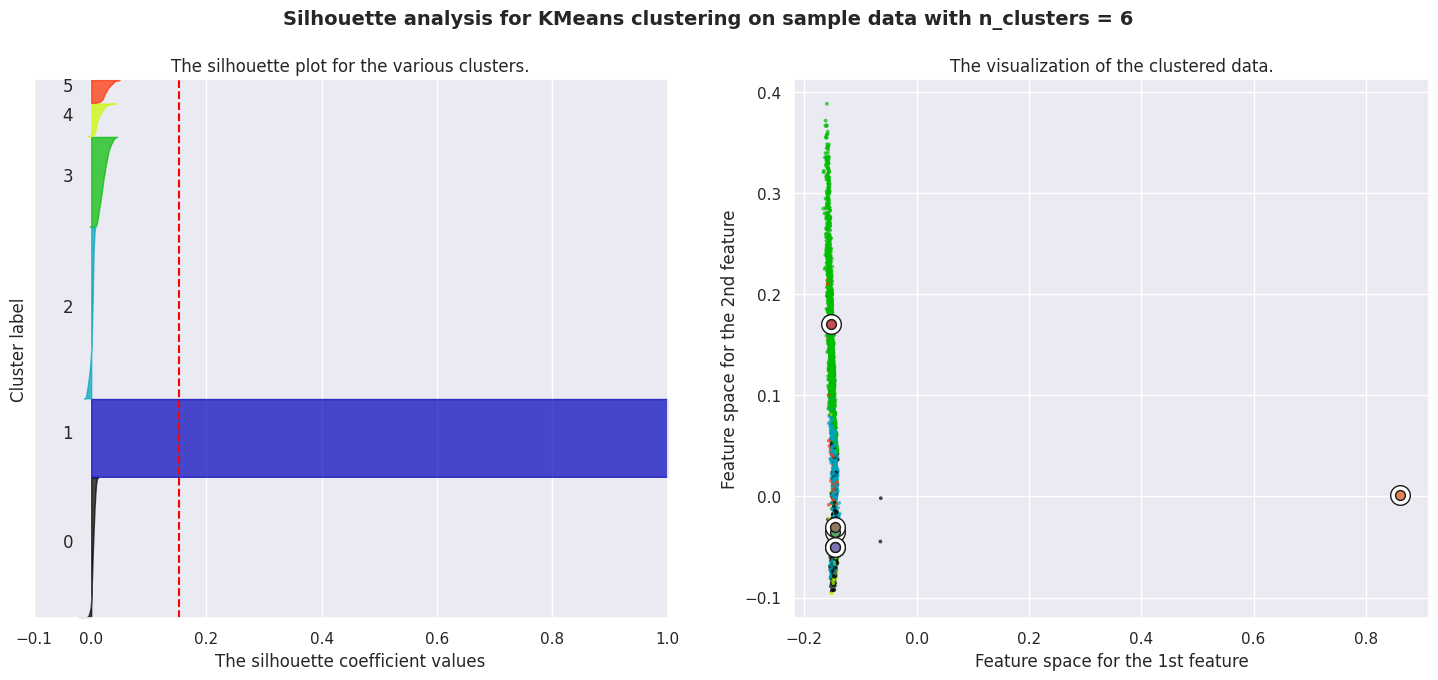

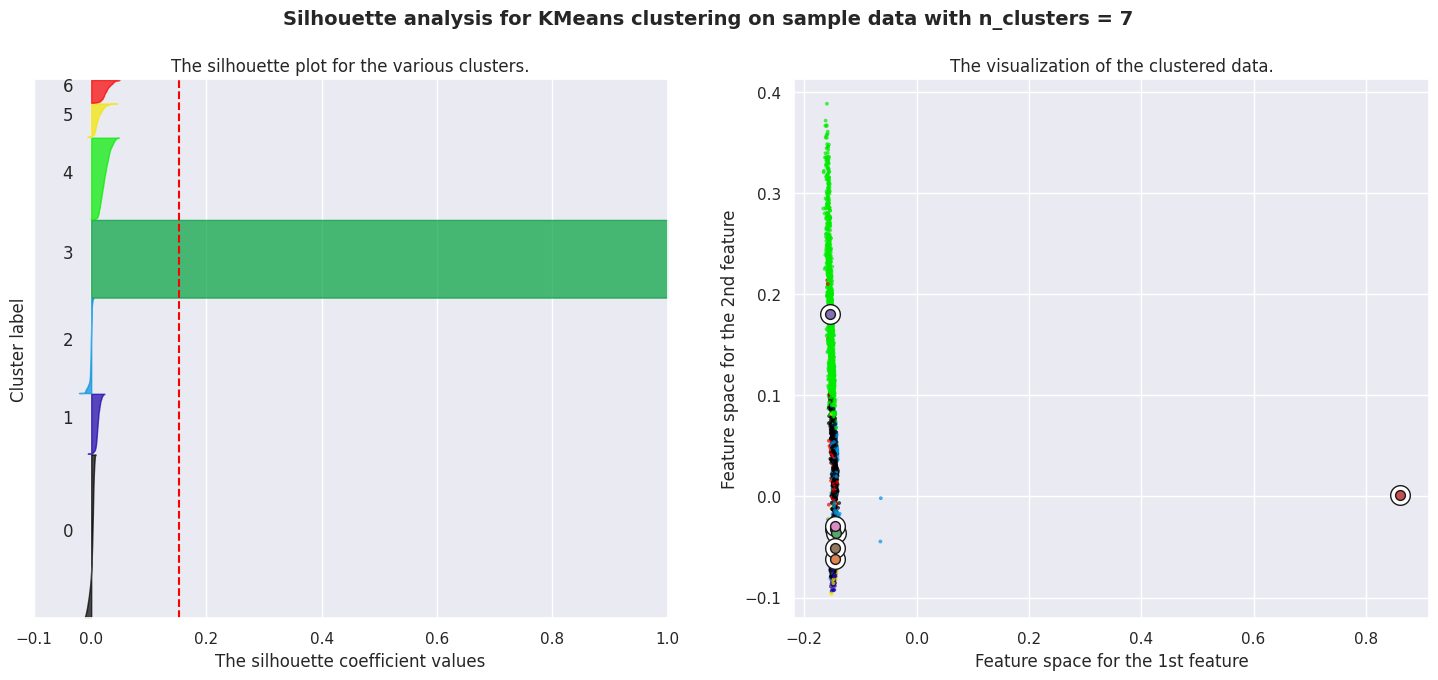

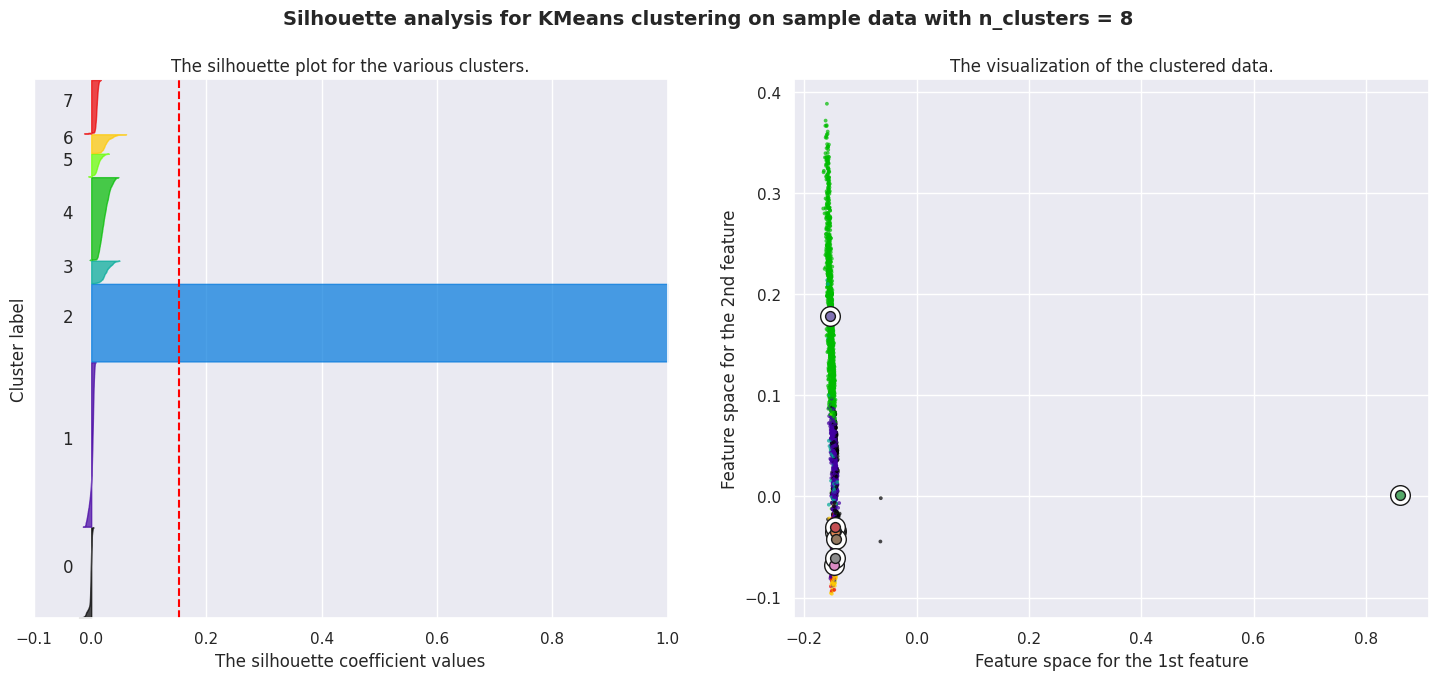

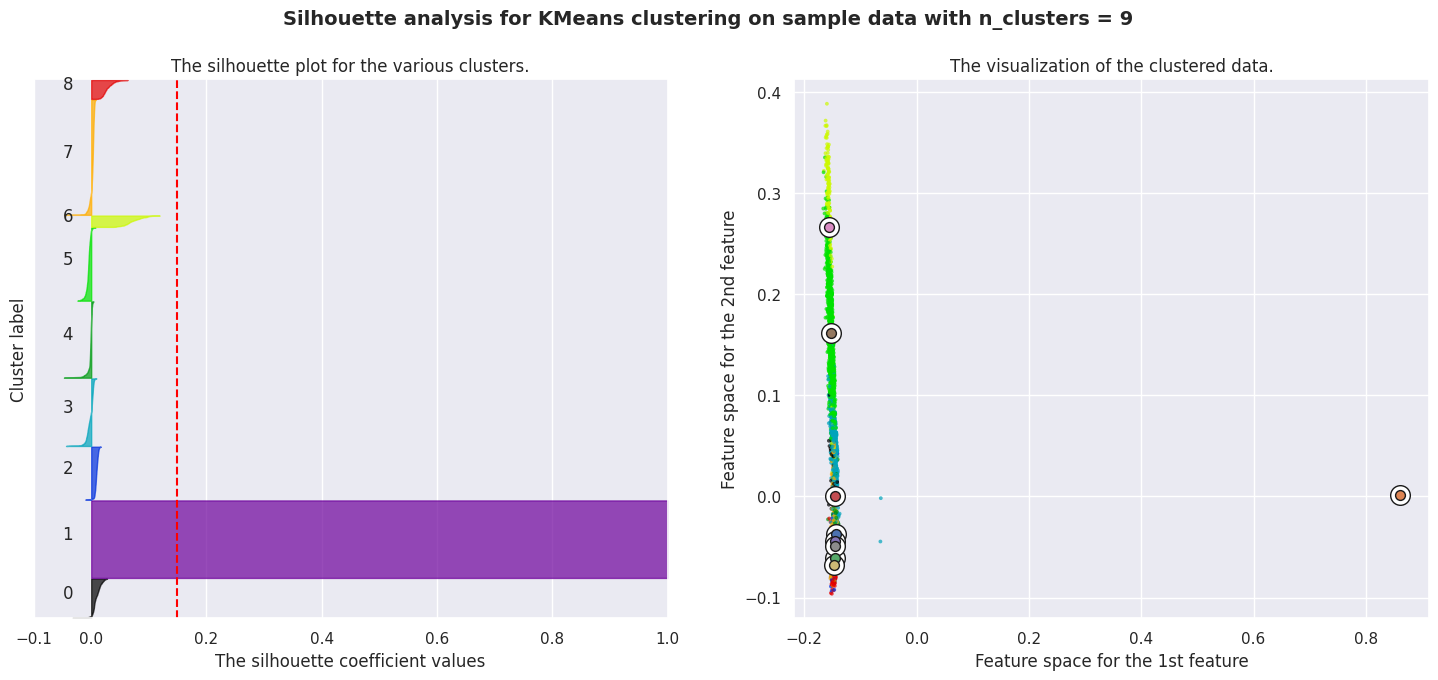

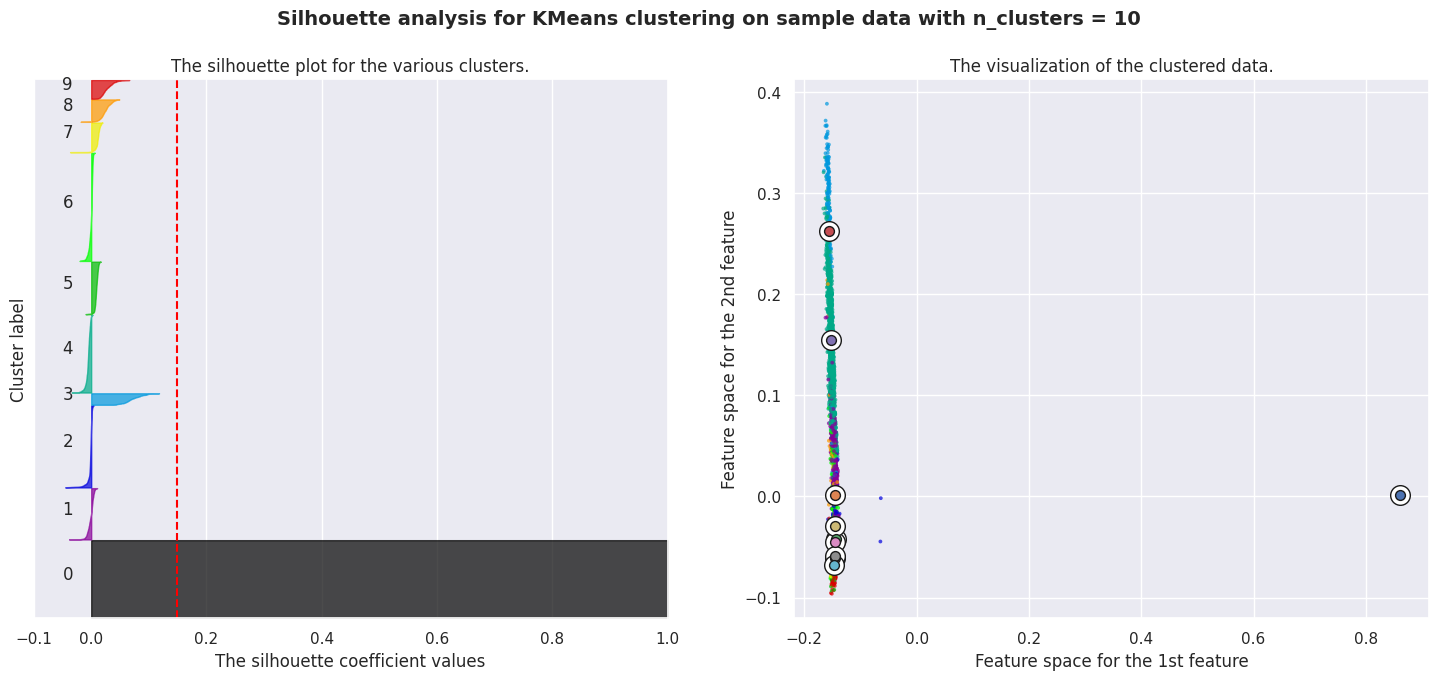

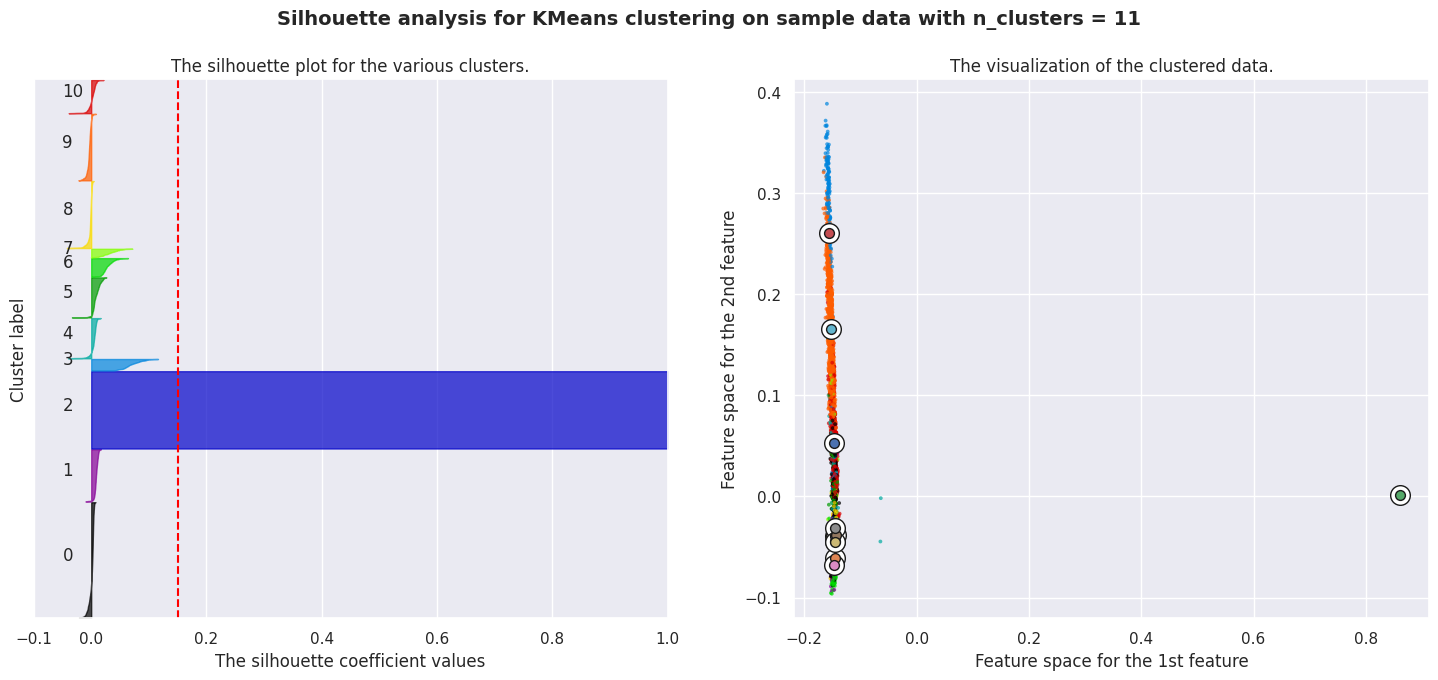

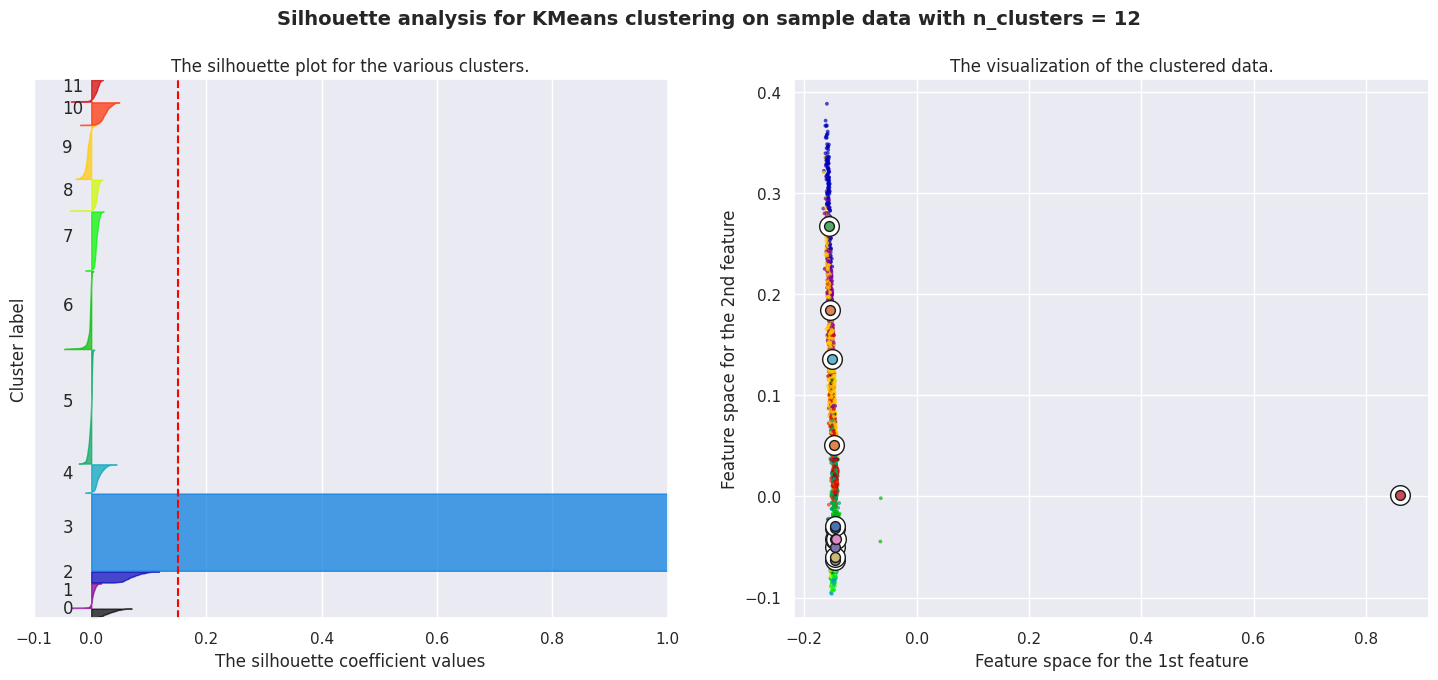

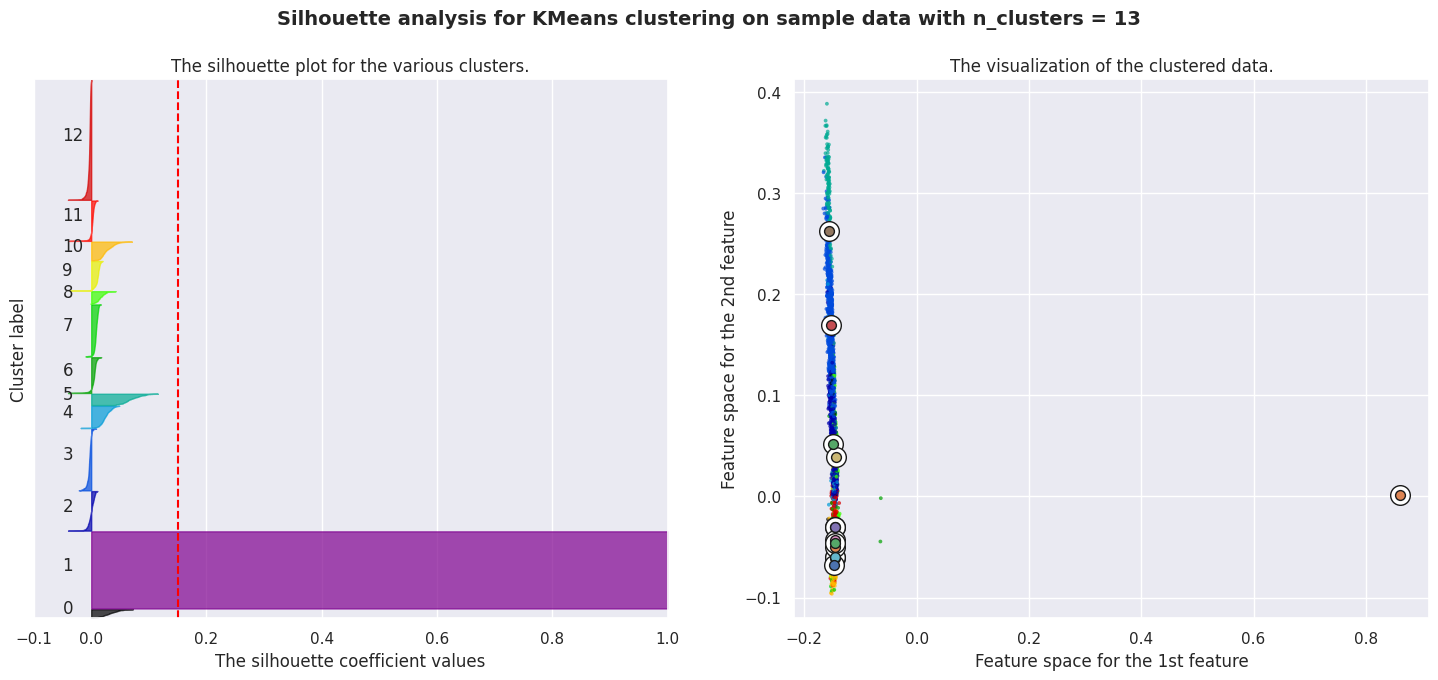

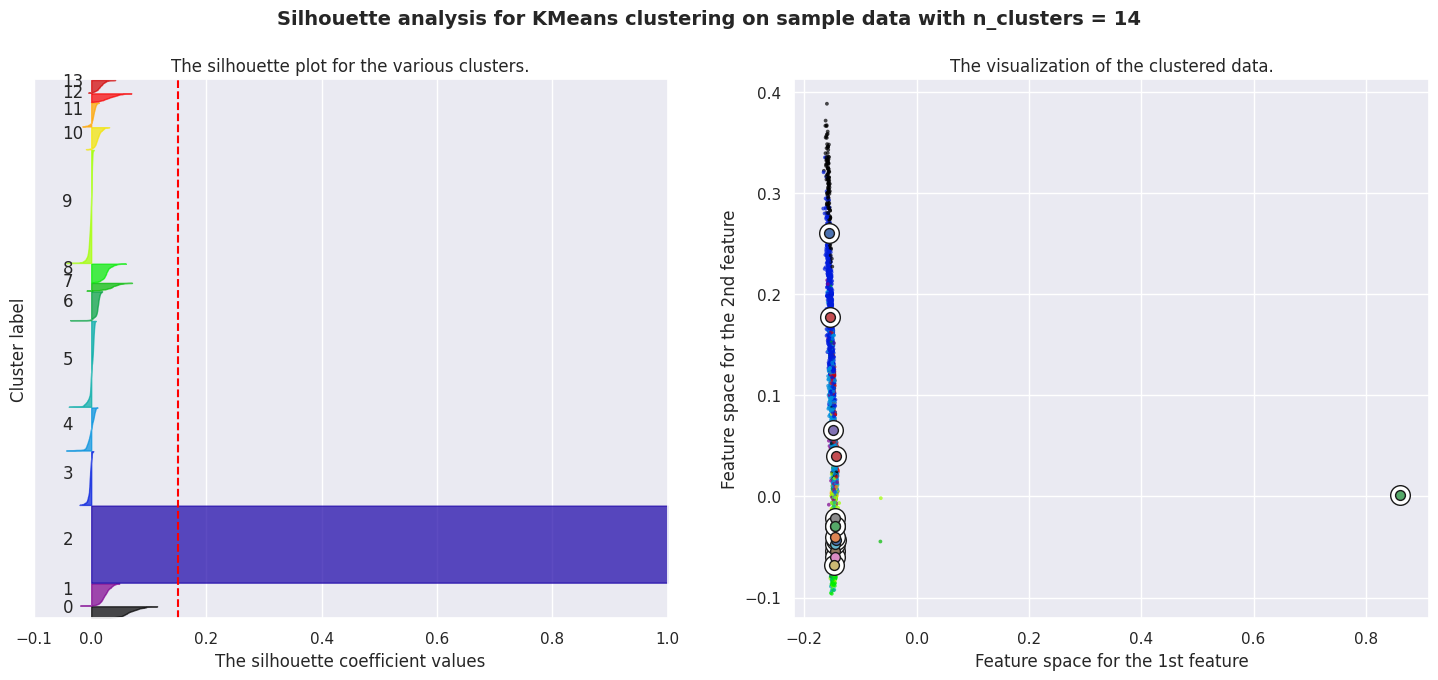

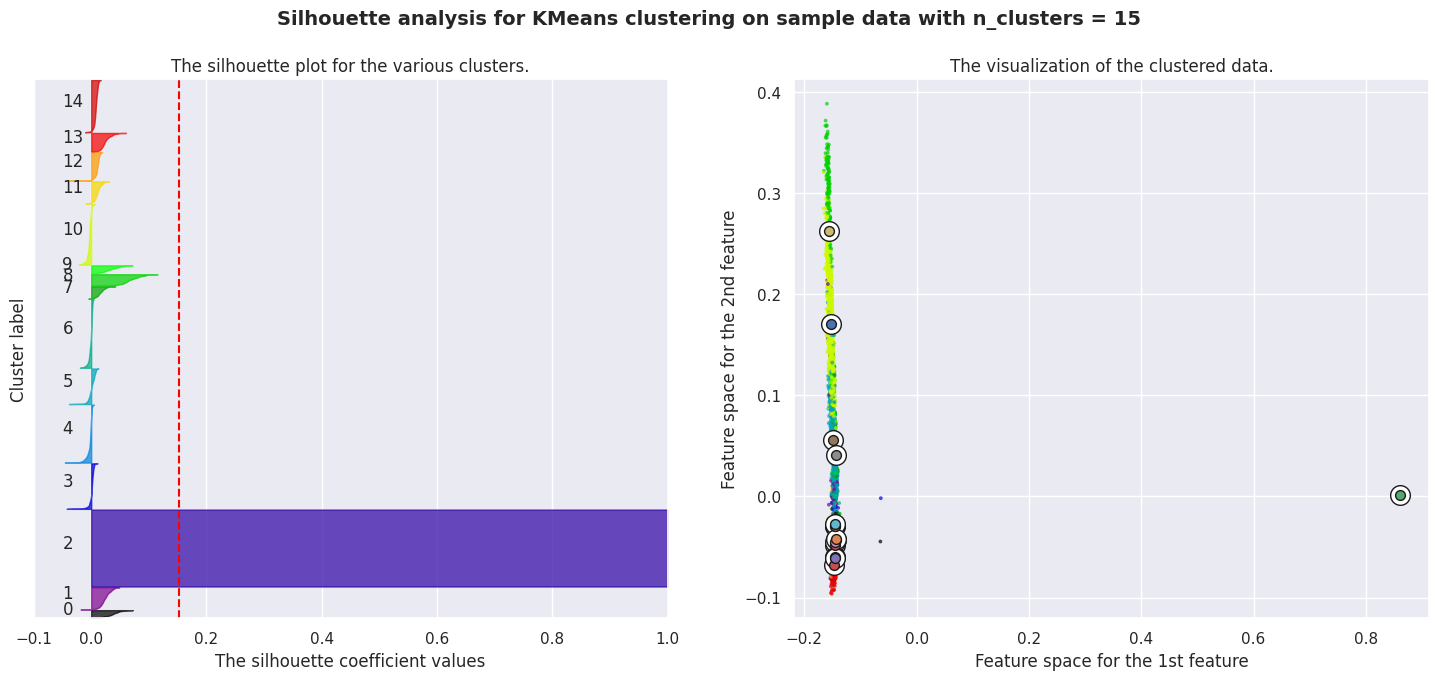

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_transformed) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_transformed)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_transformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_transformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X_transformed[:, 0], X_transformed[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


##### Answer - We used Silhouette score method and after evaluating the Silhouette Score, we found that the best score was achieved with 15 clusters, which amounted to 0.0077226308384750935.

#### 2. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

##### Answer - The Silhouette score evaluates cluster quality in algorithms like K-Means. It measures how well samples are grouped together based on similarity. A good Silhouette score is important for recommendation systems, like Netflix, as it indicates their effectiveness in suggesting similar content. This can lead to profitability by providing accurate and relevant recommendations to users.

#Dendogram for K-means

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# Here we are Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_transformed, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Description and Listed In')
plt.ylabel('Euclidean Distances')
plt.show()

RecursionError: maximum recursion depth exceeded while getting the str of an object

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

##### Answer - By analyzing the dendrogram, we identified the largest vertical distance that can be drawn without intersecting any other horizontal line. We then passed a line through this distance and counted the number of vertical lines it intersected. We found that the ideal number of clusters for K-means, from the dendrogram perspective, is 15 clusters.

#K-means Clustering with 20 clusters

In [ ]:

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=20, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

# Here we are predicting the labels of clusters.
label = kmeans.fit_predict(X_transformed)
# Let's check the unique labels
unique_labels = np.unique(label)

# function to plot the result
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

#K-means Clustering with 15 clusters.

In [ ]:

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=15, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

# Predicting the labels of clusters.
label = kmeans.fit_predict(X_transformed)
# let's check all the unique labels
unique_labels = np.unique(label)

# function to plot the result
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

# Hierarchical Clustering:-
## Hierarchical clustering is a clustering algorithm used to group similar data points based on their distances or similarities. It creates a hierarchy of clusters by recursively merging or splitting clusters until a stopping condition is met.

## There are two main types of hierarchical clustering:
1. #### Agglomerative Clustering
2. #### Divisive Hierarchical Clustering

#Agglomerative Clustering

In [ ]:
# Importing agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 15, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_transformed)

In [ ]:

# Here visualizing the clusters in three dimensions.
plt.figure(figsize=(20,8))
plt.scatter(X_transformed[y_hc == 0, 0], X_transformed[y_hc == 0, 1], s = 100, label = '1')
plt.scatter(X_transformed[y_hc == 1, 0], X_transformed[y_hc == 1, 1], s = 100, label = '2')
plt.scatter(X_transformed[y_hc == 2, 0], X_transformed[y_hc == 2, 1], s = 100, label = '3')
plt.scatter(X_transformed[y_hc == 3, 0], X_transformed[y_hc == 3, 1], s = 100, label = '4')
plt.scatter(X_transformed[y_hc == 4, 0], X_transformed[y_hc == 4, 1], s = 100, label = '5')
plt.scatter(X_transformed[y_hc == 5, 0], X_transformed[y_hc == 5, 1], s = 100, label = '6')
plt.scatter(X_transformed[y_hc == 6, 0], X_transformed[y_hc == 6, 1], s = 100, label = '6')
plt.scatter(X_transformed[y_hc == 7, 0], X_transformed[y_hc == 7, 1], s = 100, label = '7')
plt.scatter(X_transformed[y_hc == 8, 0], X_transformed[y_hc == 8, 1], s = 100, label = '8')
plt.scatter(X_transformed[y_hc == 9, 0], X_transformed[y_hc == 9, 1], s = 100, label = '9')
plt.scatter(X_transformed[y_hc == 10, 0], X_transformed[y_hc == 10, 1], s = 100, label = '10')
plt.scatter(X_transformed[y_hc == 11, 0], X_transformed[y_hc == 11, 1], s = 100, label = '11')
plt.scatter(X_transformed[y_hc == 12, 0], X_transformed[y_hc == 12, 1], s = 100, label = '12')
plt.scatter(X_transformed[y_hc == 13, 0], X_transformed[y_hc == 13, 1], s = 100, label = '13')
plt.scatter(X_transformed[y_hc == 14, 0], X_transformed[y_hc == 14, 1], s = 100, label = '14')
plt.scatter(X_transformed[y_hc == 15, 0], X_transformed[y_hc == 15, 1], s = 100, label = '15')
plt.title('Clusters of content')

plt.legend()
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

##### Answer - Clustering text-based features helps group similar content preferences for Netflix users. Well-formed clusters enhance the recommendation system by identifying patterns and delivering personalized suggestions. This improves user experience and content relevance on the platform.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

##### Answer - K-means is a powerful algorithm for clustering data, aiming to divide a dataset into K distinct groups where each data point belongs to a single cluster. After running K-means, the best number of clusters (15 clusters) was determined, providing optimal grouping for the given data.

#Let's Create a Recommendation System for the above Clusters

In [ ]:

# Adding the cluster values to the dateframe
data['cluster_number'] = kmeans.labels_

### We gave preference to K-means Cluster for the Recommendation System

In [ ]:

# Here we imported path,Image,WordCloud,STOPWORDS,ImageColorGenerator
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:

# Filtering the dataframe by cluster number and selected column
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = data[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  # Concatenating the words in the selected column
  text = " ".join(word for word in df_word_cloud[column_of_choice])
   # Setting the stopwords and generate word cloud
  stopwords = set(STOPWORDS)
  # Generating the word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Code to display the word cloud
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()


In [ ]:
data.head()

In [ ]:

for i in range(15):
  func_select_Category(i,'Filtered_data')

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Calculating the cosine similarity matrix
cosine_sim = cosine_similarity(X, X)
cosine_sim

In [ ]:
indices = pd.Series(data.index)
indices[:5]

In [ ]:
# Function to generates recommendations based on a movie title
def recommendations(Title, cosine_sim = cosine_sim):

    recommended_movies = []

    # Finding the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # Sorting the cosine similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # Retrieve the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)

    # Populate the list with the titles of the top 10 recommended movies
    for i in top_10_indexes:
        recommended_movies.append(list(data.index)[i])

    return recommended_movies

In [ ]:
# Iterate over a range of indices from 0 to 499
# Retrieve the movie title at index i
for i in range(0, 500):
  gg = df['title'].iloc[i]
  print(gg)

In [ ]:

# Generating the movie recommendations based on the movie 'American Psycho'
movie_recommendations = pd.DataFrame(recommendations('American Psycho'), columns=['Recommendations'])
movie_recommendations



In [ ]:

#  Generating TV show recommendations based on the TV show 'Stranger Things'
tvshows_recommendations = pd.DataFrame(recommendations('Stranger Things'), columns=['Recommendations'])
tvshows_recommendations.head(11)

# **Conclusion**

In this project, we had to solve a text clustering problem, which required us to categorise or group Netflix shows into distinct clusters based on how similar or unlike the shows were to one another inside each cluster.

There were 11 attributes and roughly 7787 records in the dataset.
We started by addressing the missing values in the dataset and performing exploratory data analysis (EDA).

Netflix was found to host a greater quantity of films than TV series on its platform, and the quantity of new shows that are added to Netflix is increasing at an exponential rate. Additionally, most Netflix series were made for the adult and young adult age range, and most of the episodes were produced in the United States.

The decision was made to group the data according to the following criteria: description, director, cast, nation, and genre. TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these properties.

We generated twenty thousand characteristics in total using TFIDF Vectorization.
The Principal Component Analysis (PCA) was employed to address the issue of dimensionality curse. Since 4000 components could account for over 80% of the variance, only 4000 components could be used.

Utilising the Silhouette score approach, we were able to determine that the best score, or 0.0077226308384750935, was obtained with 15 clusters.

The ideal number of clusters was determined to be six when we initially constructed clusters using the k-means clustering technique. The elbow method and Silhouette score analysis were used to get this.

The Agglomerative clustering algorithm was then used to create clusters, and it was found that 12 was the ideal number of clusters. After the dendrogram was visualised, this was acquired.

Using the similarity matrix that was produced by applying cosine similarity, a content-based recommender system was constructed. Based on the kind of show the user viewed, this recommender system will provide them with ten recommendations.

